In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!nvidia-smi

Tue Apr 23 08:16:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#custom data to train for YOLO model
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ppuLMQ5WbjPMtErLRnYz")
project = rf.workspace("modellabel").project("yolo-disaster-relief")
version = project.version(1)
dataset = version.download("yolov7")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Yolo-disaster-relief-1 in yolov7pytorch:: 100%|██████████| 266/266 [00:00<00:00, 7004.24it/s]


In [ ]:
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ppuLMQ5WbjPMtErLRnYz")
project = rf.workspace("modellabel").project("yolo-disaster-relief")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Yolo-disaster-relief-2 in yolov8:: 100%|██████████| 266/266 [00:00<00:00, 6337.14it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Yolo-disaster-relief-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vis

In [ ]:
!ls {HOME}/runs/detect/train6/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch90.jpg
confusion_matrix.png				     R_curve.png       train_batch91.jpg
events.out.tfevents.1713863358.b1a336061645.14349.0  results.csv       train_batch92.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


/content


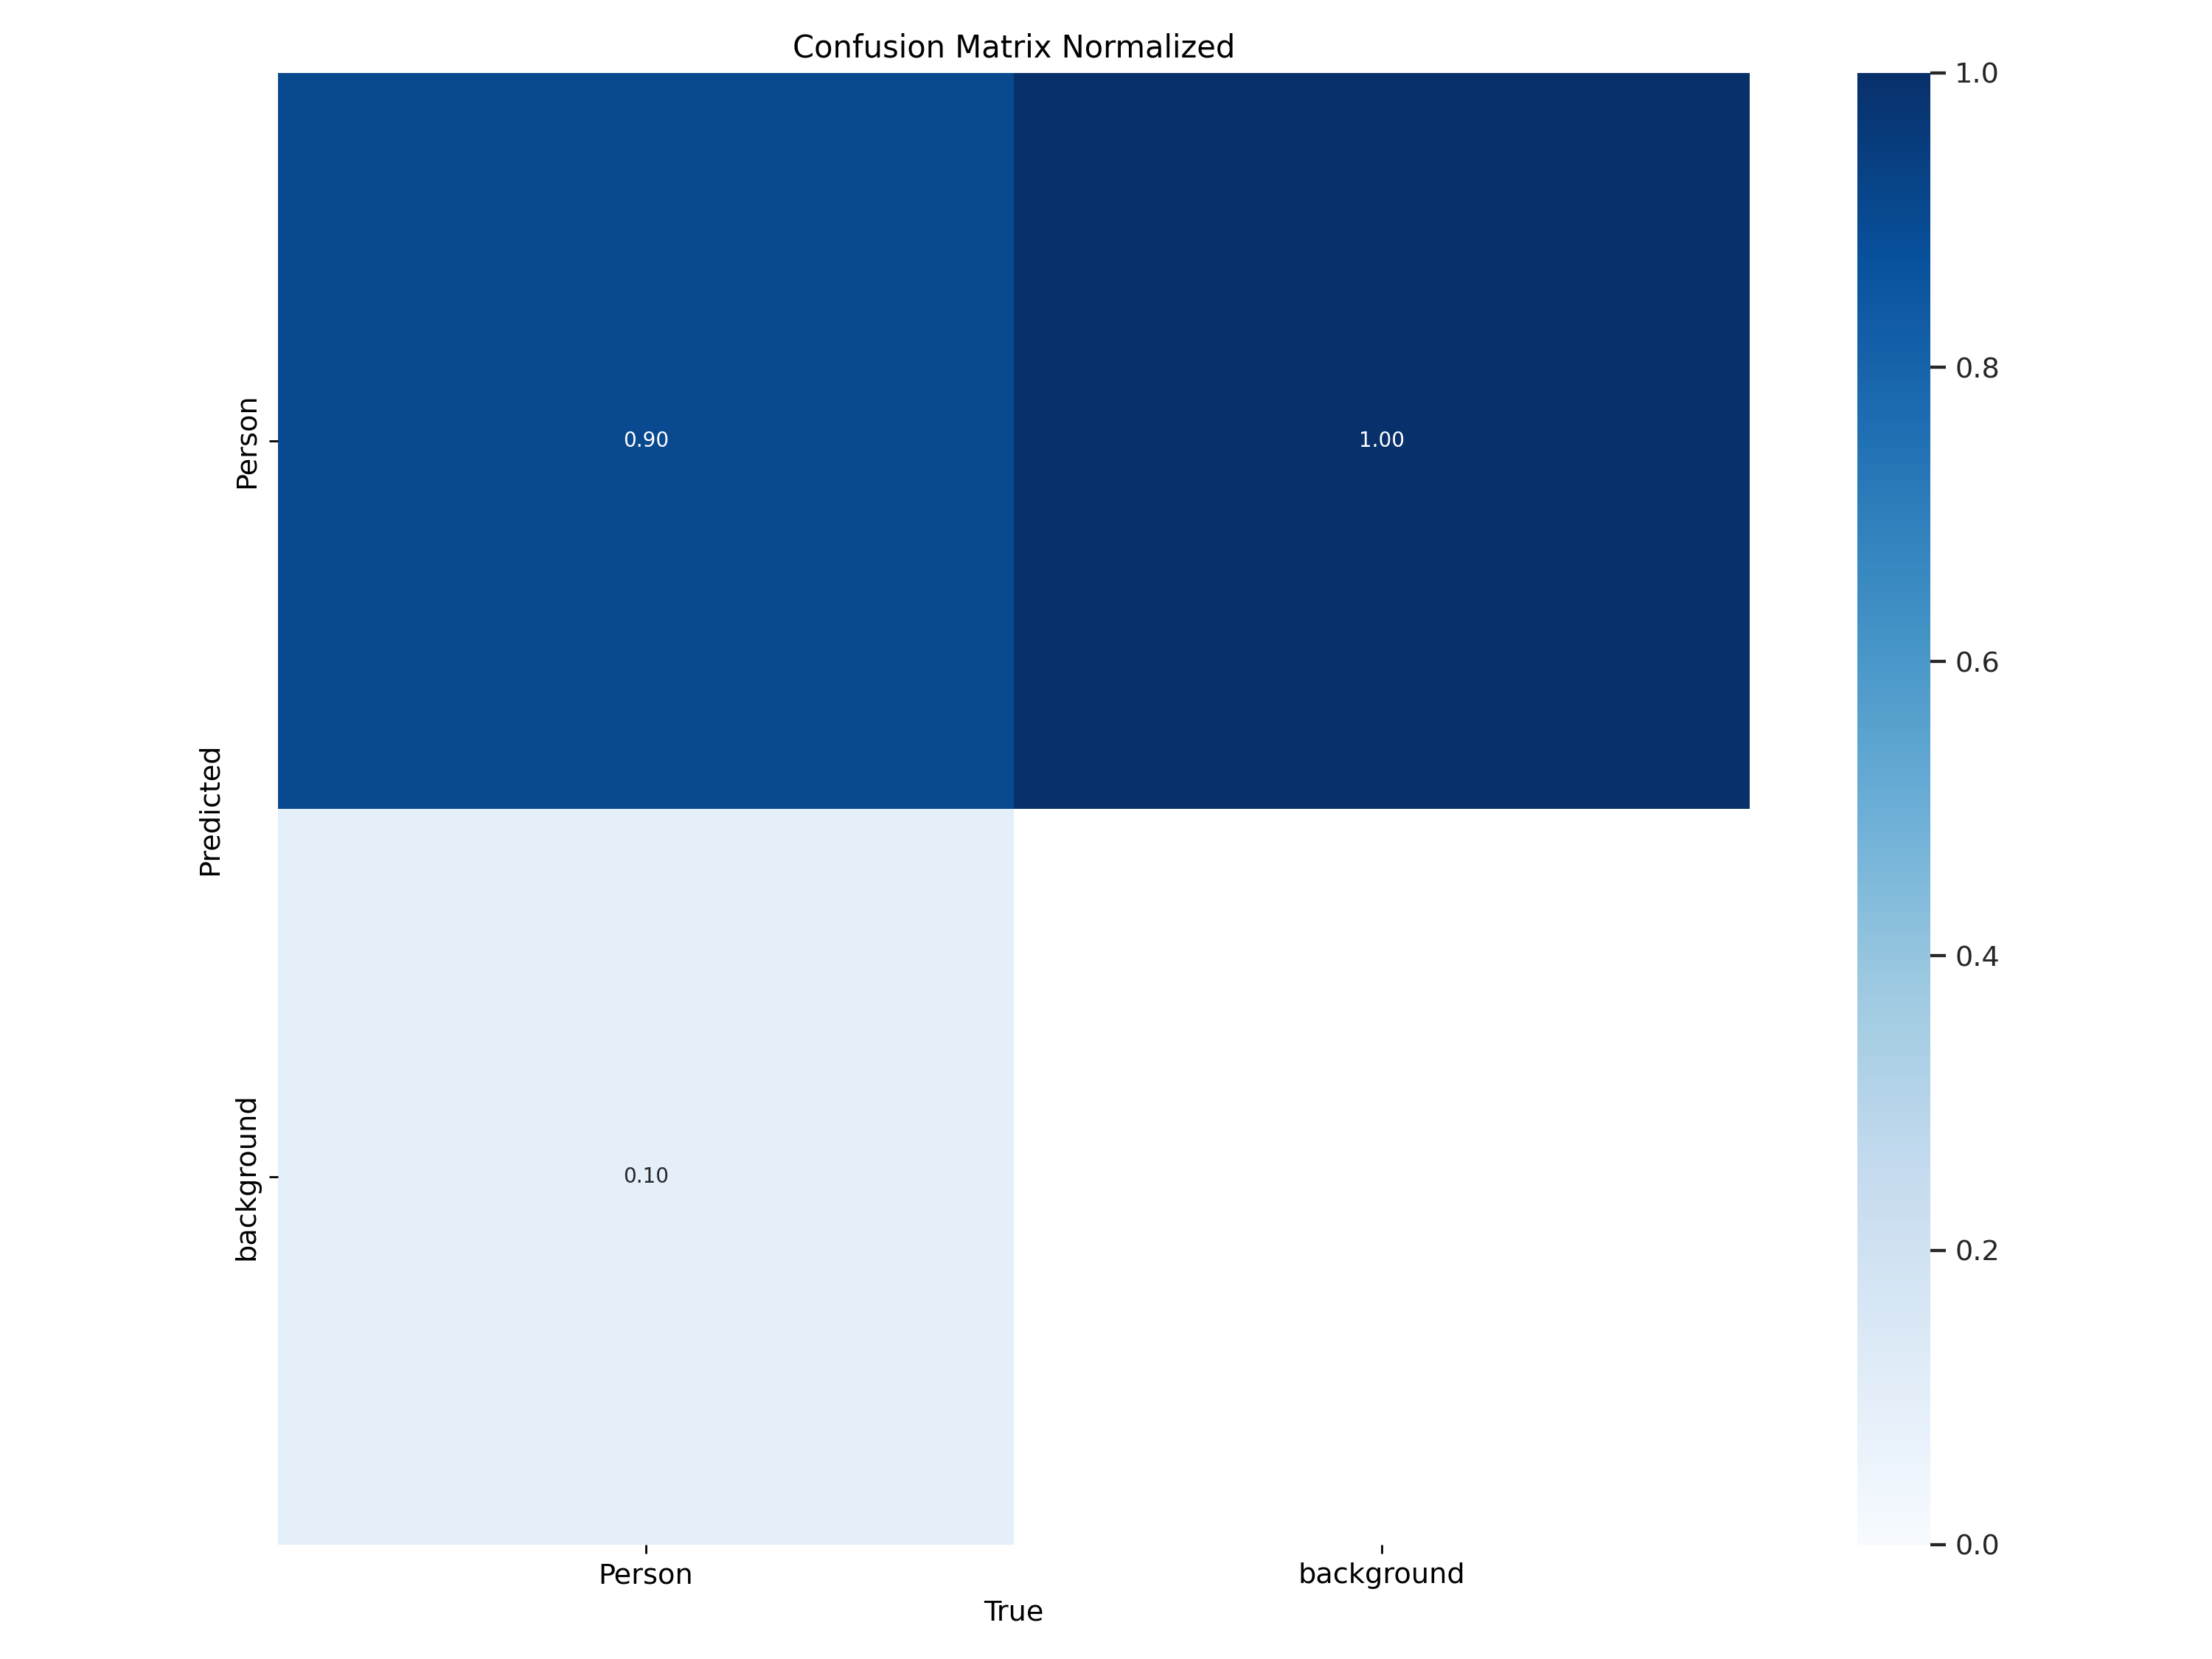

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix_normalized.png', width=600)

/content


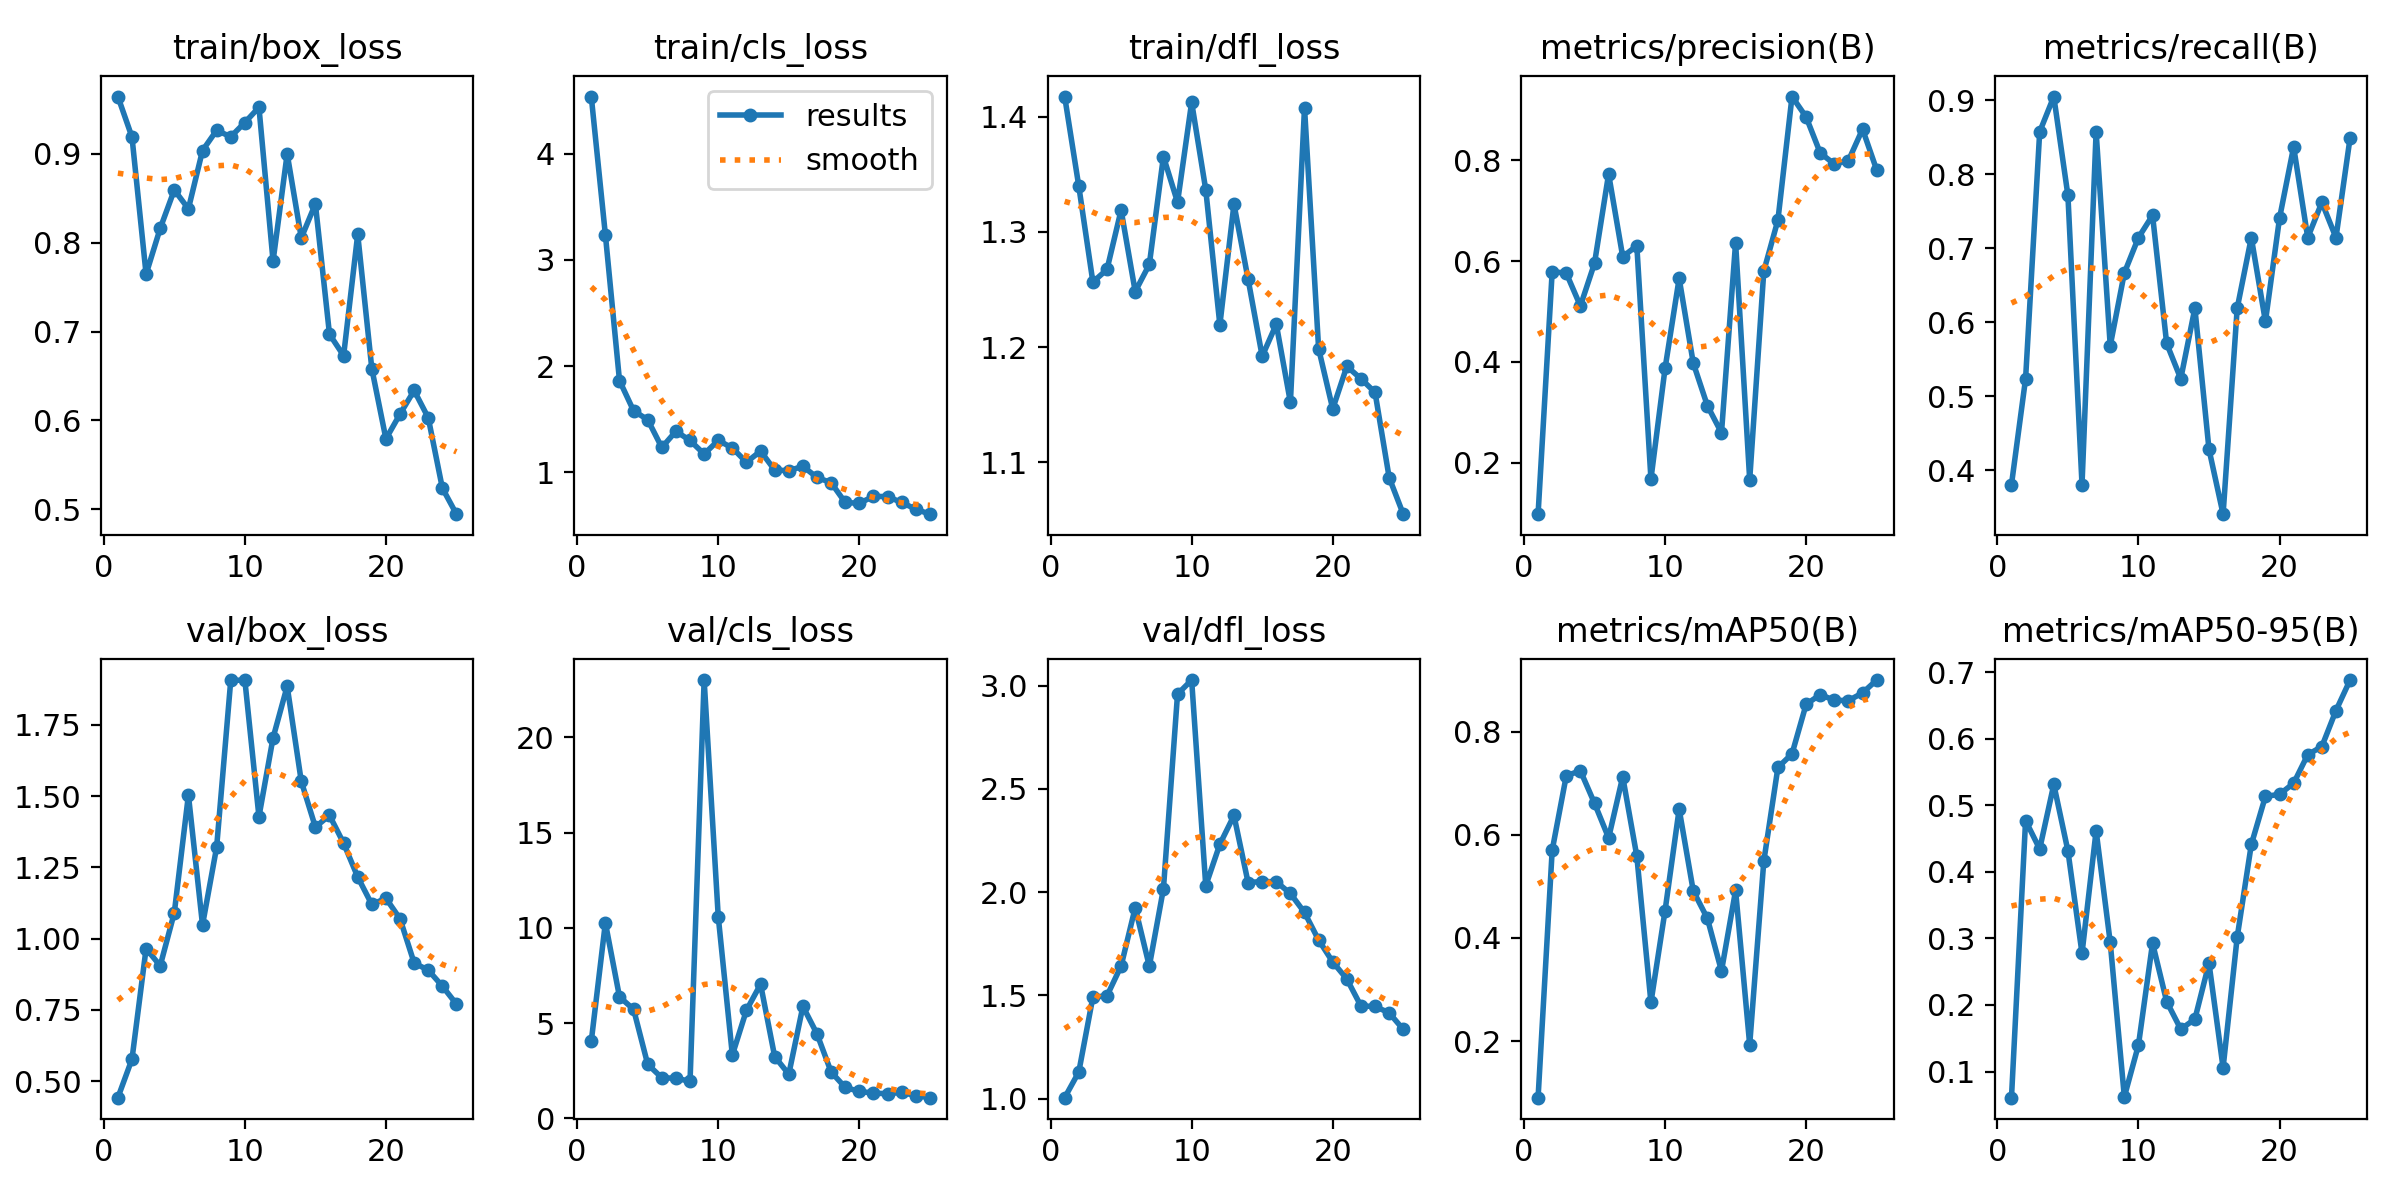

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/content


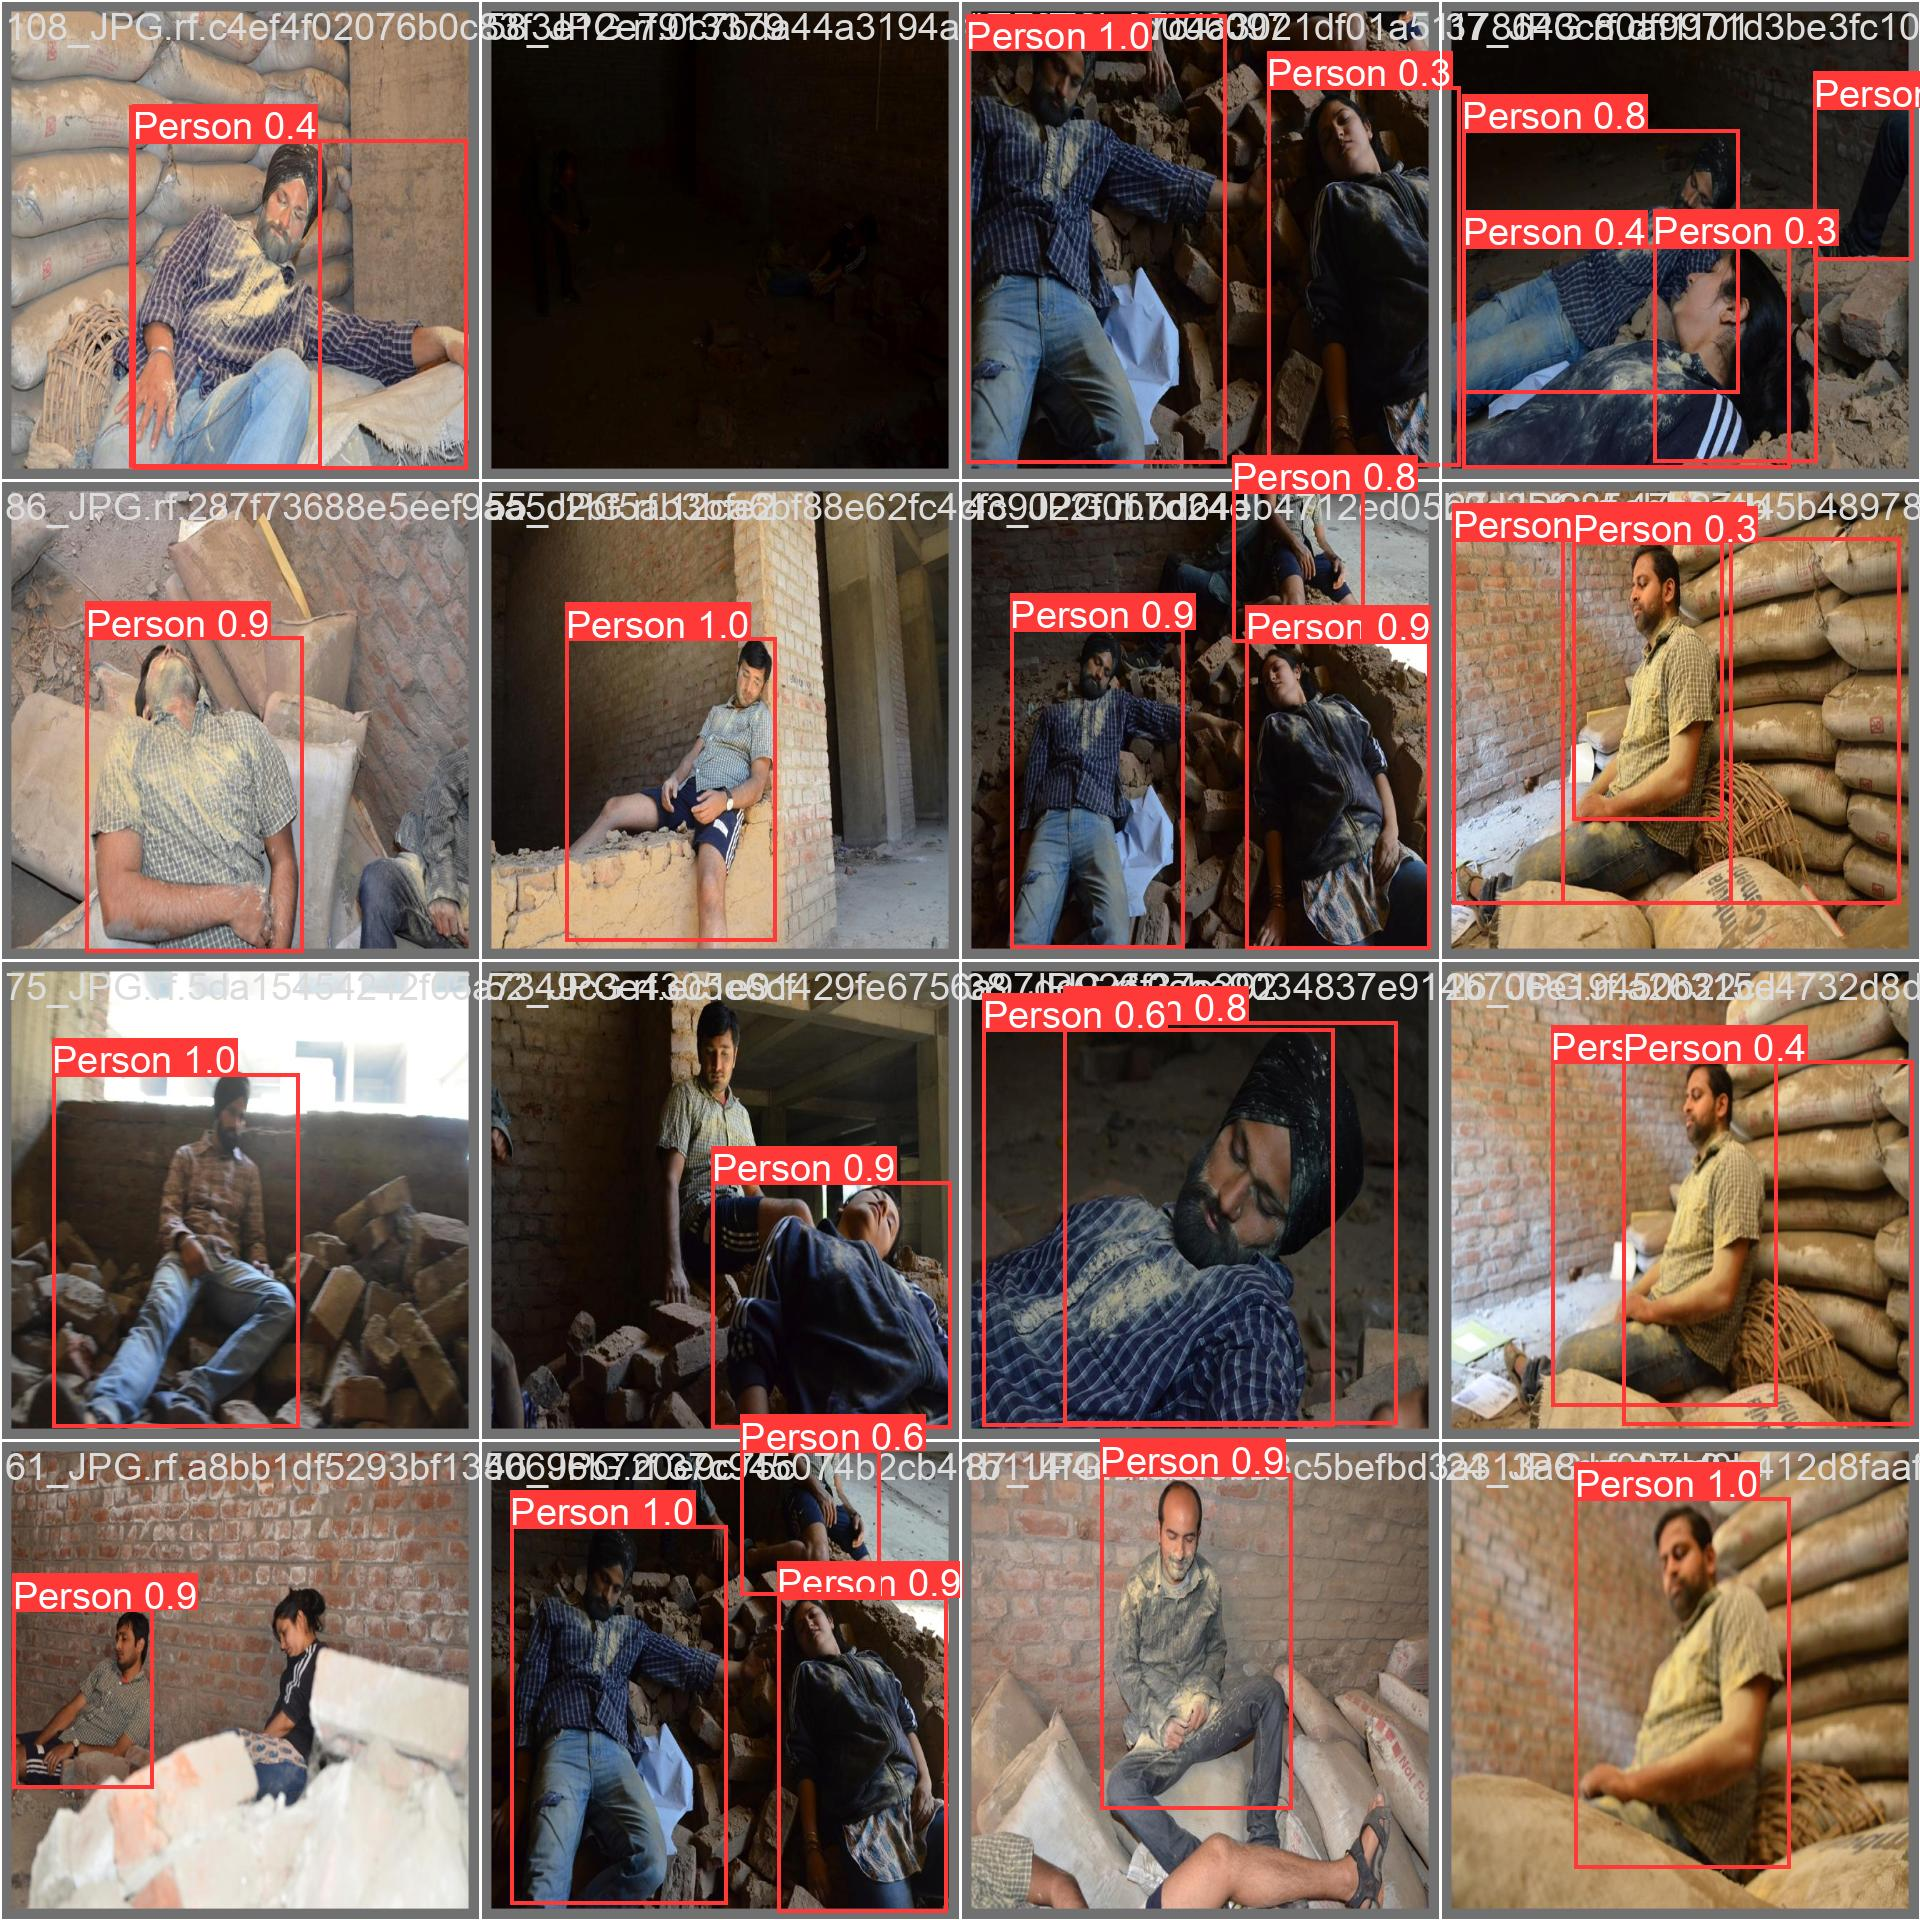

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)


Validate Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Yolo-disaster-relief-2/valid/labels.cache... 25 images, 5 backgrounds, 0 corrupt: 100% 25/25 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.06it/s]
                   all         25         21      0.781      0.849        0.9      0.688
Speed: 0.6ms preprocess, 23.4ms inference, 0.0ms loss, 25.5ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


Inference with custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/13 /content/datasets/Yolo-disaster-relief-2/test/images/102_JPG.rf.3bd478bf3d2af3bf12ce5cf85b7f2497.jpg: 640x640 1 Person, 16.3ms
image 2/13 /content/datasets/Yolo-disaster-relief-2/test/images/103_JPG.rf.b121cdb180a37029fa5845587766c811.jpg: 640x640 2 Persons, 16.4ms
image 3/13 /content/datasets/Yolo-disaster-relief-2/test/images/107_JPG.rf.37d9440f8d37572c56e38c503c18d225.jpg: 640x640 2 Persons, 16.4ms
image 4/13 /content/datasets/Yolo-disaster-relief-2/test/images/117_JPG.rf.0b63e102ebad0aa42531b9b706316f44.jpg: 640x640 1 Person, 20.0ms
image 5/13 /content/datasets/Yolo-disaster-relief-2/test/images/121_JPG.rf.7b2435876e5a6c0ea8bac5151f708a6f.jpg: 640x640 1 Person, 16.4ms
image 6/13 /content/datasets/Yolo-disaster-relief-2/test/images/19_JPG.rf.15e3088ee6e12

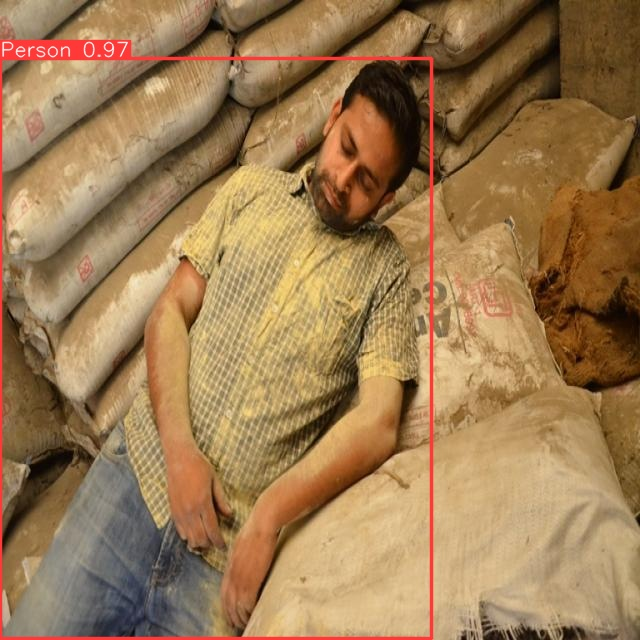

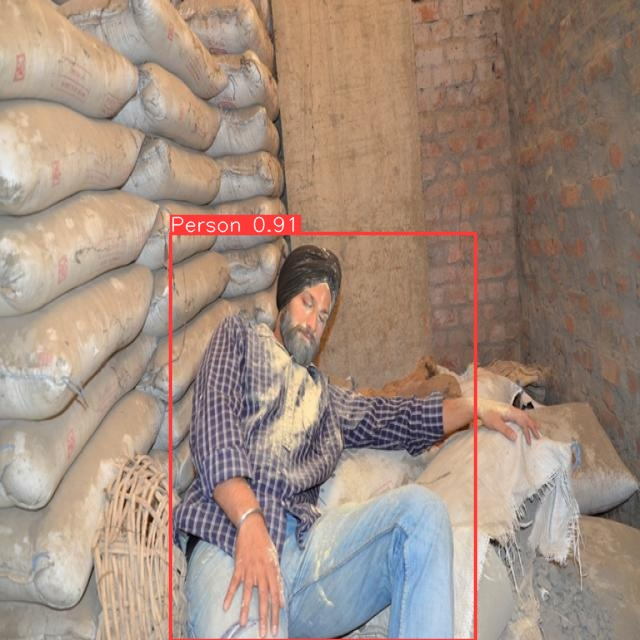

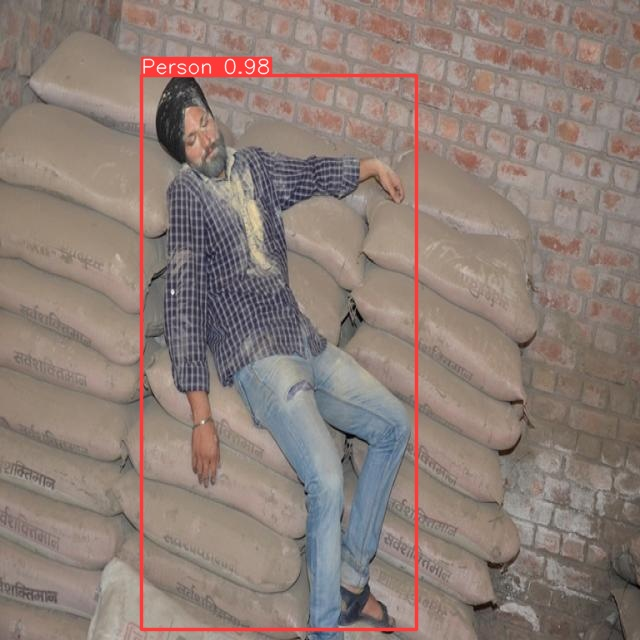

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="ppuLMQ5WbjPMtErLRnYz")
project = rf.workspace("modellabel").project("yolo-disaster-relief")
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train6/")

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/modellabel/yolo-disaster-relief/2
Share your model with the world at: https://universe.roboflow.com/modellabel/yolo-disaster-relief/model/2


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred